In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
import statsmodels.api as sm
from sklearn import linear_model
from tqdm import tnrange, tqdm_notebook
from sklearn.metrics import mean_squared_error
from statsmodels.regression.quantile_regression import QuantReg

from sklearn.preprocessing import StandardScaler

import os

from sklearn.model_selection import train_test_split

In [9]:
import pandas as pd
import numpy
import os
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [4]:
x=pd.DataFrame(X)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint,EarlyStopping
# 모델 저장 폴더 설정
MODEL_DIR = './model0/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath=MODEL_DIR+"{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer,early_stopping_callback])

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['val_accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

# early stop
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

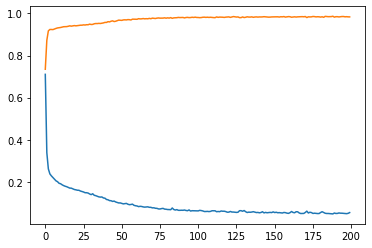

In [16]:
plt.plot(x_len,history.history['loss'])
plt.plot(x_len,history.history['accuracy'])

In [18]:
loss = history.history['loss']
acc = history.history['accuracy']